<a href="https://colab.research.google.com/github/viviannemedeiros/modelosPreditivos/blob/master/ExercicioListaAtividade3_VivianneMedeiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto Final/Atividade 3 - Modelos Preditivos - 22/06/2020** 

**Prof:** Ricardo Prudêncio

**Discente:** Vivianne Medeiros


In [1]:
# Importando libs necessárias
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Atividade 3**

In [2]:
# Carregando os dados. Importante: deve-se fazer upload do respectivo arquivo na sessão antes de executar este comando.
dados = pd.read_csv('https://raw.githubusercontent.com/viviannemedeiros/modelosPreditivos/master/KaggleV2-May-2016.csv') 

### **Análise Exploratória dos Dados:** conhecendo os dados e efetuando as  transformações necessárias

In [3]:
# Amostra das instâncias
dados.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
# Exclusão das colunas de identificadores gerados pelo sistema
dados.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)


In [5]:
# Informações sobre os dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [6]:
# Ajustando os tipos de dados das datas
dados['ScheduledDay'] = pd.to_datetime(dados['ScheduledDay']).dt.date.astype('datetime64[ns]')
dados.AppointmentDay = dados.AppointmentDay.apply(np.datetime64)
dados.dtypes

Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

In [7]:
print("Features => {}".format(dados.columns.ravel()))

Features => ['Gender' 'ScheduledDay' 'AppointmentDay' 'Age' 'Neighbourhood'
 'Scholarship' 'Hipertension' 'Diabetes' 'Alcoholism' 'Handcap'
 'SMS_received' 'No-show']


In [8]:
# Dados estatísticos gerais sobre cada coluna
dados.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# Verificando a quantidade de dados
dados.shape

(110527, 12)

In [10]:
# Verificando quantidade de dados nulos
dados.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [11]:
# Verificando valores errados ou indefinidos
print("Age => {}".format(np.sort(dados.Age.unique()))) #print('Age:',sorted(dados.Age.unique()))
print("Gender => {}".format(dados.Gender.unique())) #print('Gender:',dados.Gender.unique())
print("Neighbourhood => {}".format(np.sort(dados.Neighbourhood.unique())))
print('Diabetes =>',dados.Diabetes.unique())
print('Alcoholism =>',dados.Alcoholism.unique())
print('Hipertension =>',dados.Hipertension.unique())
print('Handcap =>',dados.Handcap.unique())
print('Scholarship =>',dados.Scholarship.unique())
print('SMS_received =>',dados.SMS_received.unique())

Age => [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115]
Gender => ['F' 'M']
Neighbourhood => ['AEROPORTO' 'ANDORINHAS' 'ANTÔNIO HONÓRIO' 'ARIOVALDO FAVALESSA'
 'BARRO VERMELHO' 'BELA VISTA' 'BENTO FERREIRA' 'BOA VISTA' 'BONFIM'
 'CARATOÍRA' 'CENTRO' 'COMDUSA' 'CONQUISTA' 'CONSOLAÇÃO' 'CRUZAMENTO'
 'DA PENHA' 'DE LOURDES' 'DO CABRAL' 'DO MOSCOSO' 'DO QUADRO'
 'ENSEADA DO SUÁ' 'ESTRELINHA' 'FONTE GRANDE' 'FORTE SÃO JOÃO' 'FRADINHOS'
 'GOIABEIRAS' 'GRANDE VITÓRIA' 'GURIGICA' 'HORTO' 'ILHA DAS CAIEIRAS'
 'ILHA DE SANTA MARIA' 'ILHA DO BOI' 'ILHA DO FRADE' 'ILHA DO PRÍNCIPE'
 'ILHAS OCEÂNICAS DE TRINDADE' 'INHANGUETÁ' 'ITAR

In [12]:
print("Total Neighbourhood => {}".format(dados.Neighbourhood.unique().size))

Total Neighbourhood => 81


In [13]:
# Removendo idades inválidas
dados = dados[dados.Age >= 0] # dados = dados[(dados.Age >= 0) & (dados.Age <= 100)] # Removendo outliers também
dados.shape

(110526, 12)

In [14]:
# Calcula tempo de espera em dias para substituir pelas datas
dados['Waiting_Time_days'] = dados['AppointmentDay'] - dados['ScheduledDay']
dados['Waiting_Time_days'] = dados['Waiting_Time_days'].dt.days

# Exclusão das colunas de datas
dados.drop(['ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)
dados.sample(n=5)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Waiting_Time_days
53487,M,17,DE LOURDES,0,0,0,0,0,0,No,0
81962,F,45,ITARARÉ,0,0,0,1,0,0,No,1
108838,F,34,ILHA DE SANTA MARIA,0,0,0,0,0,0,No,0
100173,M,66,TABUAZEIRO,0,0,0,0,0,0,No,0
28832,F,34,ROMÃO,1,1,0,0,0,1,Yes,15


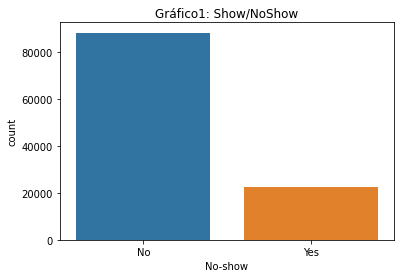

In [15]:
# Verificando a distribuição das instâncias nas classes
ax = sns.countplot(x=dados['No-show'], data=dados)
ax.set_title("Gráfico1: Show/NoShow")
plt.show()

In [16]:
print("Quantidade de registros e percentual por classe")
print(dados.groupby(['No-show']).size()) #print(dados['No-show'].value_counts())
show = dados.groupby(['No-show']).size()[0]/(dados.groupby(['No-show']).size()[0]+dados.groupby(['No-show']).size()[1])
print("\nPercentual Comparecimento => {:.2f}%".format(show*100))
noshow = dados.groupby(['No-show']).size()[1]/(dados.groupby(['No-show']).size()[0]+dados.groupby(['No-show']).size()[1])
print("Percentual Falta => {:.2f}%".format(noshow*100))

Quantidade de registros e percentual por classe
No-show
No     88207
Yes    22319
dtype: int64

Percentual Comparecimento => 79.81%
Percentual Falta => 20.19%


**Destaques:** analisando **Gráfico1** e os números associados, observa-se o desbalanceamento dos dados, visto que a ausência à consulta ocorre em cerca de 20% dos casos.

 ### **Estudo da influência das características para o problema**

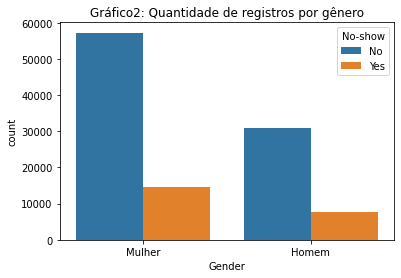

In [17]:
# Quantidade de registros por gênero
ax = sns.countplot(x=dados.Gender, hue=dados['No-show'], data=dados)
ax.set_title("Gráfico2: Quantidade de registros por gênero")
x_ticks_labels=['Mulher', 'Homem']
ax.set_xticklabels(x_ticks_labels)
plt.show()

**Destaques:** o **Gráfico2** exibe que a maioria das consultas são com pacientes mulheres. Analisando apenas as ausências, aparenta-se manter a mesma proporção dos dados gerais. 

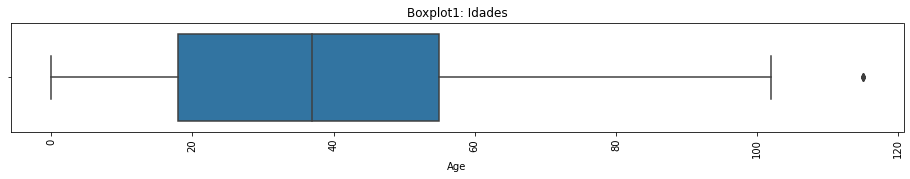

In [18]:
# Verificando outliers
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
plt.title('Boxplot1: Idades')
_ = sns.boxplot(x=dados.Age)

**Destaques:** No **Boxplot1**, verifica-se que a idade média é próxima de 38, além disso, confirma-se a presença de alguns outliers, mas que não serão descartados por assumir que podem existir na realidade.

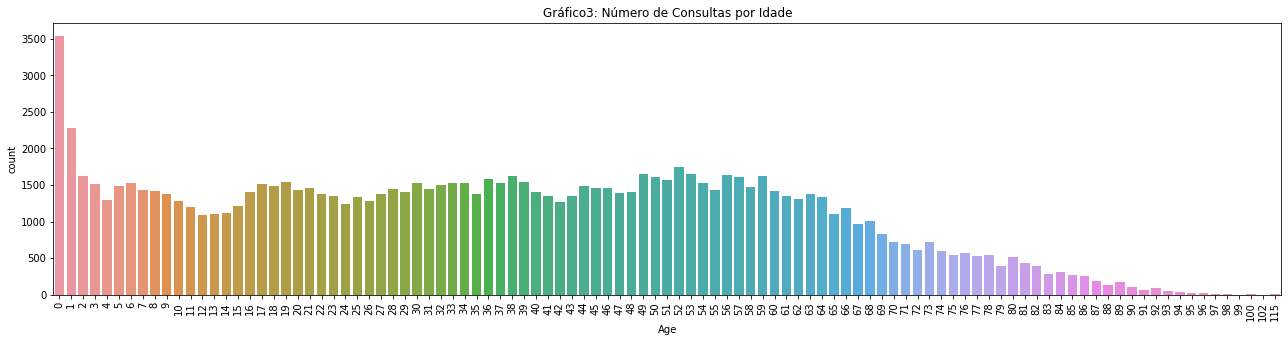

In [19]:
plt.figure(figsize=(22,5))
plt.xticks(rotation=90)
ax = sns.countplot(x=dados.Age)
ax.set_title("Gráfico3: Número de Consultas por Idade")
plt.show()

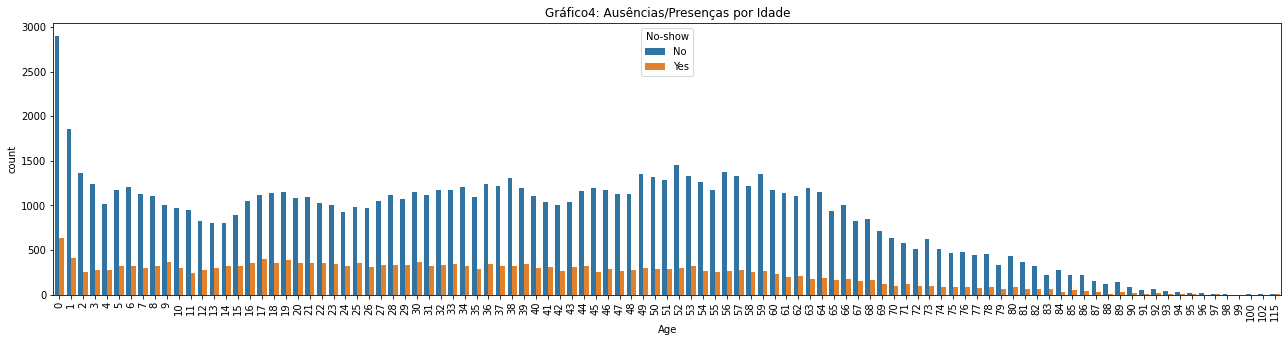

In [20]:
# Verificando se há prevalência de uma certa idade nas ausências/presença às consultas
plt.figure(figsize=(22,5))
plt.xticks(rotation=90)
ax = sns.countplot(x=dados.Age, hue=dados['No-show'])
ax.set_title("Gráfico4: Ausências/Presenças por Idade")
plt.show()

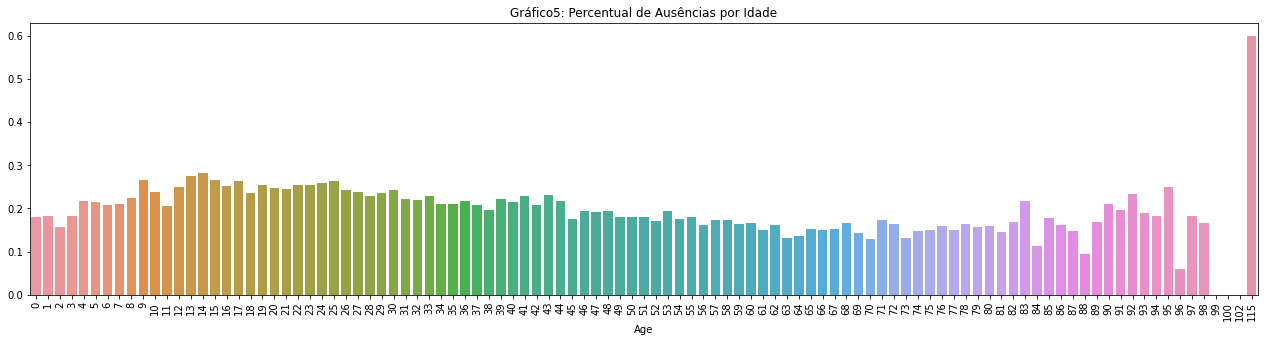

In [21]:
age_ratio = dados[dados['No-show'] == 'Yes'].groupby(['Age']).size()/dados.groupby(['Age']).size()
plt.figure(figsize=(22,5))
plt.xticks(rotation=90)
ax = sns.barplot(x=age_ratio.index, y=age_ratio)
ax.set_title("Gráfico5: Percentual de Ausências por Idade")
plt.show()

**Destaques:** no **Gráfico3**, observa-se que a maioria das consultas são de crianças. Já o **Gráfico4** compara a presença e ausência às consultas por idade, sendo redesenhado para exibir o percentual de ausências por idade no **Gráfico5**. Neste último, verifica-se que os mais velhos faltam menos às consultas, exceto os *outliers* que tem poucos registros de consultas e distorcem o resultado.

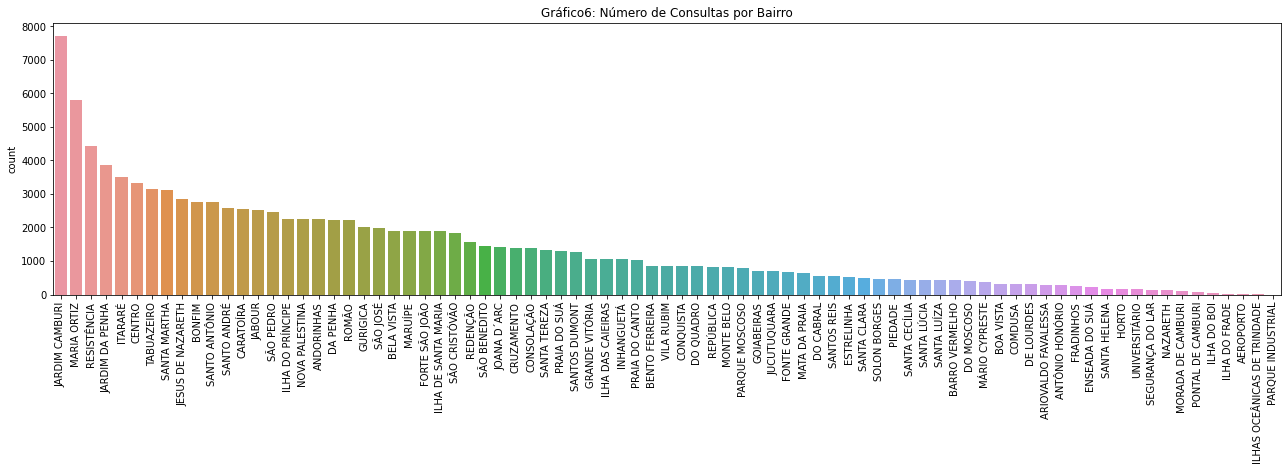

In [22]:
plt.figure(figsize=(22,5))
plt.xticks(rotation=90)
ax = sns.countplot(x=np.sort(dados.Neighbourhood), order=dados.Neighbourhood.value_counts().index)
ax.set_title("Gráfico6: Número de Consultas por Bairro")
plt.show()

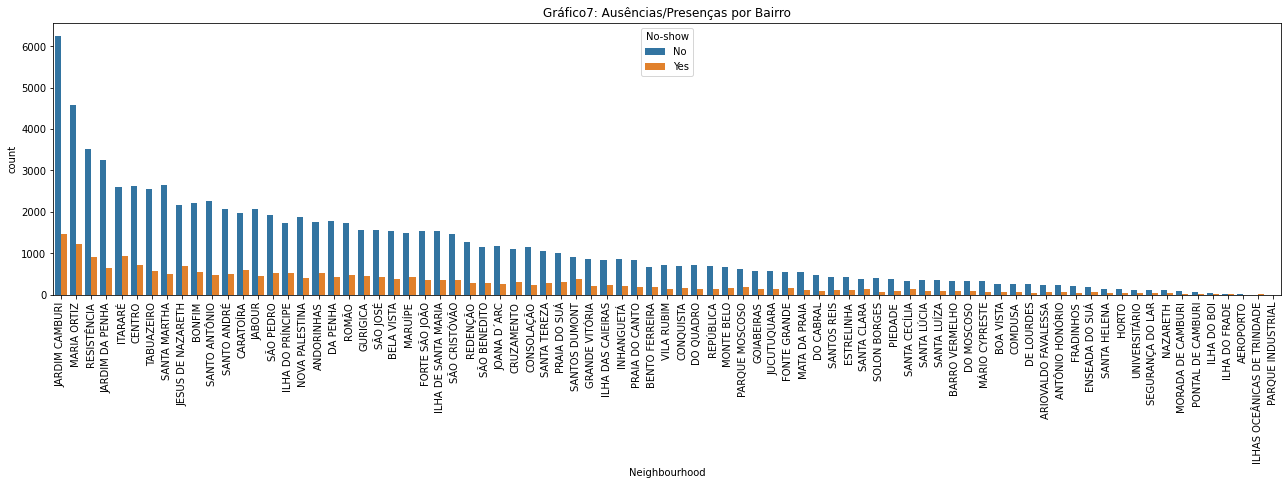

In [23]:
plt.figure(figsize=(22,5))
plt.xticks(rotation=90)
ax = sns.countplot(x=dados.Neighbourhood, hue=dados['No-show'], order=dados.Neighbourhood.value_counts().index)
ax.set_title("Gráfico7: Ausências/Presenças por Bairro")
plt.show()

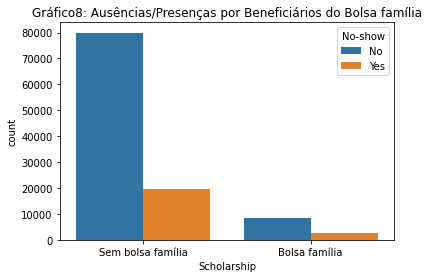

In [24]:
ax = sns.countplot(x=dados.Scholarship, hue=dados['No-show'], data=dados)
ax.set_title("Gráfico8: Ausências/Presenças por Beneficiários do Bolsa família")
x_ticks_labels=['Sem bolsa família', 'Bolsa família']
ax.set_xticklabels(x_ticks_labels)
plt.show()

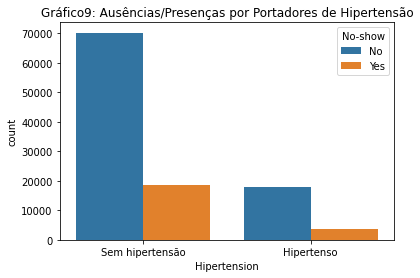

In [25]:
ax = sns.countplot(x=dados.Hipertension, hue=dados['No-show'], data=dados)
ax.set_title("Gráfico9: Ausências/Presenças por Portadores de Hipertensão")
x_ticks_labels=['Sem hipertensão', 'Hipertenso']
ax.set_xticklabels(x_ticks_labels)
plt.show()

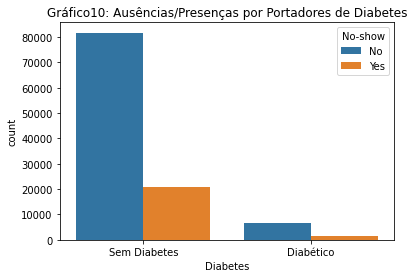

In [26]:
ax = sns.countplot(x=dados.Diabetes, hue=dados['No-show'], data=dados)
ax.set_title("Gráfico10: Ausências/Presenças por Portadores de Diabetes")
x_ticks_labels=['Sem Diabetes', 'Diabético']
ax.set_xticklabels(x_ticks_labels)
plt.show()

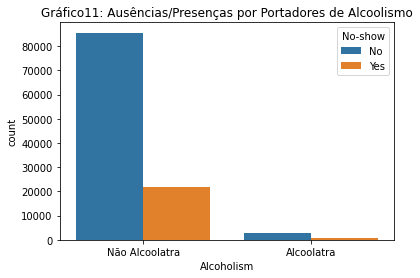

In [27]:
ax = sns.countplot(x=dados.Alcoholism, hue=dados['No-show'], data=dados)
ax.set_title("Gráfico11: Ausências/Presenças por Portadores de Alcoolismo")
x_ticks_labels=['Não Alcoolatra', 'Alcoolatra']
ax.set_xticklabels(x_ticks_labels)
plt.show()

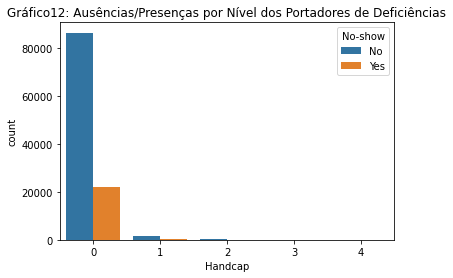

In [28]:
ax = sns.countplot(x=dados.Handcap, hue=dados['No-show'], data=dados)
ax.set_title("Gráfico12: Ausências/Presenças por Nível dos Portadores de Deficiências")
plt.show()

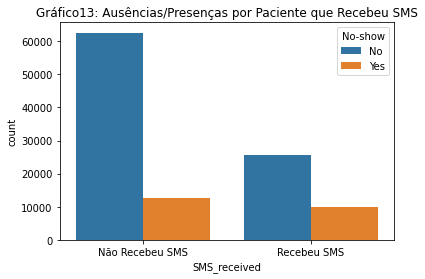

In [29]:
ax = sns.countplot(x=dados.SMS_received, hue=dados['No-show'], data=dados)
ax.set_title("Gráfico13: Ausências/Presenças por Paciente que Recebeu SMS")
x_ticks_labels=['Não Recebeu SMS', 'Recebeu SMS']
ax.set_xticklabels(x_ticks_labels)
plt.show()

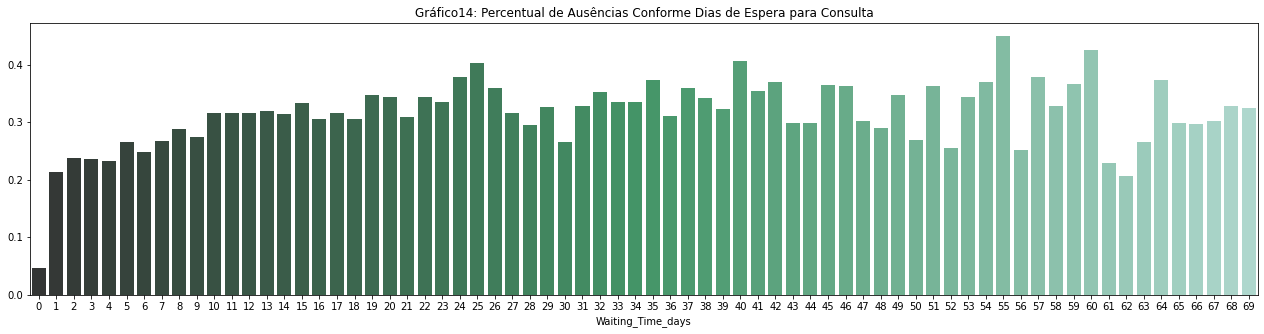

In [30]:
df_w_ratio = dados[dados['No-show'] == 'Yes'].groupby(['Waiting_Time_days']).size()/dados.groupby(['Waiting_Time_days']).size()
plt.figure(figsize=(22,5))
ax = sns.barplot(x=df_w_ratio.index, y=df_w_ratio, order=dados.Waiting_Time_days.iloc[:70].index, palette="BuGn_d")
ax.set_title("Gráfico14: Percentual de Ausências Conforme Dias de Espera para Consulta")
plt.show()

**Comentários Gerais:** observando os gráficos, na maioria das características não se percebe claramente uma diferença que influencie a presença/ausência à consulta, aparentemente mantendo a proporção existente nos dados gerais. O **Gráfico13** denota mais nitidamente que há uma relação entre quem não compareceu sendo influenciada pela característica recebeu ou não SMS, bem como o **Gráfico14**, onde observa-se que pessoas que marcaram a consulta no mesmo dia do atendimento faltam menos ao compromisso.

De forma a ser mais preciso na escolha das características que influenciam a resposta, mais adiante, utilizaremos técnicas para efetuar a seleção automática das características que mais contribuem para determinar a ausência ou presença na consulta.

### **Gerando as bases de treinamento e testes**

In [31]:
# Usando LabelEncoder para transformar os labels em um valor entre 0 e (número de classes do atributo - 1)
le = LabelEncoder()
dados['Gender'] = le.fit_transform(dados['Gender'])
dados['Neighbourhood'] = le.fit_transform(dados['Neighbourhood'])
dados['No-show'] = le.fit_transform(dados['No-show'])
dados.sample(10)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Waiting_Time_days
89110,0,30,1,0,0,0,0,0,1,1,7
72860,1,62,1,0,1,0,1,0,0,0,0
21468,0,55,60,0,1,1,0,0,1,0,4
4965,0,56,78,0,0,0,0,0,0,1,2
6616,0,60,38,0,0,0,0,0,0,0,2
5609,0,35,33,0,0,0,0,0,0,0,3
4579,0,47,30,0,0,0,0,0,1,0,5
66449,0,7,66,1,0,0,0,0,0,0,0
59842,0,32,30,0,0,0,0,0,0,0,0
80651,1,9,65,0,0,0,0,0,1,0,3


In [32]:
# Recuperando os dados 
X = dados.drop(['No-show'], axis=1)
X

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Waiting_Time_days
0,0,62,39,0,1,0,0,0,0,0
1,1,56,39,0,0,0,0,0,0,0
2,0,62,45,0,0,0,0,0,0,0
3,0,8,54,0,0,0,0,0,0,0
4,0,56,39,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
110522,0,56,43,0,0,0,0,0,1,35
110523,0,51,43,0,0,0,0,0,1,35
110524,0,21,43,0,0,0,0,0,1,41
110525,0,38,43,0,0,0,0,0,1,41


In [33]:
# Recuperando os rótulos 
y = dados['No-show']
y 

0         0
1         0
2         0
3         0
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: No-show, Length: 110526, dtype: int64

In [34]:
# Dividindo base de dados em treino e teste (30% para teste)
dados_treino, dados_teste, rotulos_treino, rotulos_teste = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42) 

**Importante:** Conforme ressaltou-se na seção anterior, os dados estão desbalanceados, assim, utilizou-se o parâmetro "stratify=y" para ter todas as classes em treino e teste.

### **Seleção dos classificadores e treinamento na base de dados**

In [35]:
# Criando classificadores com os parâmetros default para servir de base de comparação
clf_dtc = DecisionTreeClassifier(random_state=42)
clf_rf = RandomForestClassifier()
clf_knn = KNeighborsClassifier()

In [36]:
dados.dtypes

Gender               int64
Age                  int64
Neighbourhood        int64
Scholarship          int64
Hipertension         int64
Diabetes             int64
Alcoholism           int64
Handcap              int64
SMS_received         int64
No-show              int64
Waiting_Time_days    int64
dtype: object

In [37]:
dados_treino

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Waiting_Time_days
61134,1,9,66,0,0,0,0,0,0,0
109425,1,64,36,0,1,1,0,0,1,4
22806,0,19,13,0,0,0,0,0,1,23
96175,1,28,39,0,0,0,0,0,1,5
68158,0,73,1,0,1,1,0,0,0,28
...,...,...,...,...,...,...,...,...,...,...
22678,0,30,74,1,0,0,0,0,0,0
104926,1,51,66,1,0,0,1,0,0,0
24908,1,49,43,0,0,0,0,0,0,33
63178,0,53,38,0,1,0,0,0,0,1


In [38]:
# Treinando classificador DecisionTreeClassifier
clf_dtc.fit(dados_treino, rotulos_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [39]:
# DecisionTreeClassifier: Avaliando com a base de teste a f-measure do modelo gerado
predict_dtc = clf_dtc.predict(dados_teste)
metrics.f1_score(rotulos_teste, predict_dtc)

0.32901159243441125

In [40]:
# Treinando classificador RandomForest
clf_rf.fit(dados_treino, rotulos_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
# RandomForest: Avaliando com a base de teste a f-measure do modelo gerado
predict_rf = clf_rf.predict(dados_teste)
metrics.f1_score(rotulos_teste, predict_rf)

0.2768009075439592

In [42]:
# Treinando classificador KNN
clf_knn.fit(dados_treino, rotulos_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
# KNN: Avaliando com a base de teste a f-measure do modelo gerado
predict_knn = clf_knn.predict(dados_teste)
metrics.f1_score(rotulos_teste, predict_knn)

0.2581081081081081

### **Avaliando e Comparando os classificadores**

In [44]:
# Avaliando os classificadores com relação à acurácia, precisão, recall e F-measure
scoring_list = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Efetuando uma validação cruzada 4-fold 
scores_dtc = cross_validate(clf_dtc, X, y, cv=4, scoring=scoring_list)
scores_rf = cross_validate(clf_rf, X, y, cv=4, scoring=scoring_list)
scores_knn = cross_validate(clf_knn, X, y, cv=4, scoring=scoring_list)

avg_scores_dtc = []
avg_scores_rf = []
avg_scores_knn = []

for score in scoring_list:
    avg_scores_dtc.append(scores_dtc['test_'+score].mean())
    avg_scores_rf.append(scores_rf['test_'+score].mean())
    avg_scores_knn.append(scores_knn['test_'+score].mean())

# Imprimindo a média das métricas extraídas das 4 execuções da validação cruzada, para cada classificador
print('Métricas: acurácia, precisão, recall e F-measure')
print('DecisionTreeClassifier - ', avg_scores_dtc)
print('Random Forest - ', avg_scores_rf)
print('KNN - ', avg_scores_knn)

Métricas: acurácia, precisão, recall e F-measure
DecisionTreeClassifier -  [0.7203554365866809, 0.5607885293587215, 0.5589964228262061, 0.5597007790803866]
Random Forest -  [0.7589707860064486, 0.5693880705650249, 0.542592988674856, 0.544132116033236]
KNN -  [0.761096988288374, 0.5701704482762726, 0.5414817538788177, 0.5424739539077134]


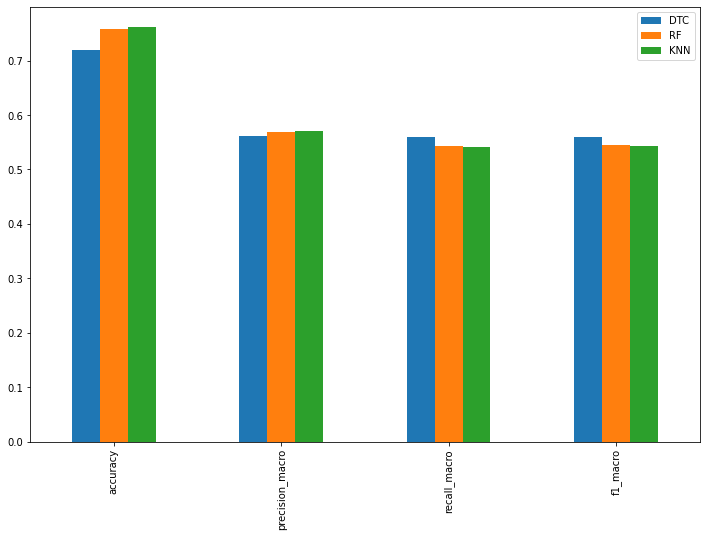

In [45]:
df = pd.DataFrame({'DTC': avg_scores_dtc,
                   'RF': avg_scores_rf,
                   'KNN': avg_scores_knn}, index=scoring_list)
ax = df.plot.bar(figsize=(12,8))

**Análise:** na avaliação efetuada com os dados em questão, o KNN apresentou os melhores valores nas métricas de acurácia e precisão. Já o DecisionTreeClassifier apresentou melhores valores para recall e F-measure. Como os dados estão desbalanceados e a classe de interesse apresenta-se em menor quantidade, acurácia não é uma boa métrica para basear a escolha do modelo, sendo mais adequada a utilização da F-measure neste contexto, a qual combina precision e recall. Dessa forma, recomenda-se a utilização do DecisionTreeClassifier.

Ressalta-se que os valores das métricas de precision, recall e F-measure foram todos  inferiores a 60%, aproximando-se assim da abordagem ingênua. Dessa forma, vamos efetuar uma análise para selecionar as características mais relevantes e reexecutar o estudo, de forma a tentar melhorar tais métricas. 


### **Selecionando Características e Refazendo a Análise**

In [46]:
# Verificando a correlação de Sperman entre os atributos
dados_correlacao = dados.corr(method='spearman')
dados_correlacao

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Waiting_Time_days
Gender,1.000000,-0.107112,-0.007770,-0.114296,-0.055722,-0.032556,0.106166,0.022437,-0.046302,-0.004122,-0.044786
Age,-0.107112,1.000000,-0.015279,-0.090105,0.503204,0.293320,0.102265,0.078888,0.015379,-0.061237,0.032991
Neighbourhood,-0.007770,-0.015279,1.000000,0.001661,0.005847,0.012164,-0.000483,0.011011,0.017521,-0.009511,-0.006639
Scholarship,-0.114296,-0.090105,0.001661,1.000000,-0.019730,-0.024894,0.035022,-0.009095,0.001192,0.029134,-0.021951
Hipertension,-0.055722,0.503204,0.005847,-0.019730,1.000000,0.433085,0.087970,0.084845,-0.006270,-0.035704,-0.007694
Diabetes,-0.032556,0.293320,0.012164,-0.024894,0.433085,1.000000,0.018473,0.059180,-0.014552,-0.015181,-0.020703
Alcoholism,0.106166,0.102265,-0.000483,0.035022,0.087970,0.018473,1.000000,0.003701,-0.026149,-0.000197,-0.044494
Handcap,0.022437,0.078888,0.011011,-0.009095,0.084845,0.059180,0.003701,1.000000,-0.025222,-0.007265,-0.029690
SMS_received,-0.046302,0.015379,0.017521,0.001192,-0.006270,-0.014552,-0.026149,-0.025222,1.000000,0.126428,0.573344
No-show,-0.004122,-0.061237,-0.009511,0.029134,-0.035704,-0.015181,-0.000197,-0.007265,0.126428,1.000000,0.281645


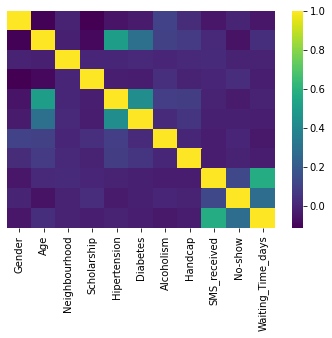

In [47]:
# Mapa de calor com valores da correlação
sns.heatmap(dados_correlacao, yticklabels=False, cbar=True, cmap='viridis')

**Análise:** Após analisar a correlação dos atributos com o resultado da classe, observa-se que as colunas Gender, Neighbourhood, Alcoholism e Handcap apresentam valor quase nulo, denotando pouca relevância e sendo candidatas a exclusão. 

A seguir, faremos uma análise mais ampla das características para selecionar os atributos mais relevantes e, então, refazer o estudo.

In [48]:
print("Feature Importance - DecisionTreeClassifier:")
for name, importance in zip(X.columns, np.sort(clf_dtc.feature_importances_)[::-1]):
    print("{} -- {:.2f}".format(name, importance))

Feature Importance - DecisionTreeClassifier:
Gender -- 0.32
Age -- 0.28
Neighbourhood -- 0.27
Scholarship -- 0.04
Hipertension -- 0.02
Diabetes -- 0.02
Alcoholism -- 0.02
Handcap -- 0.01
SMS_received -- 0.01
Waiting_Time_days -- 0.01


In [49]:
print("Feature Importance - RandomForest:")
for name, importance in zip(X.columns, np.sort(clf_rf.feature_importances_)[::-1]):
    print("{} -- {:.2f}".format(name, importance))

Feature Importance - RandomForest:
Gender -- 0.32
Age -- 0.31
Neighbourhood -- 0.30
Scholarship -- 0.02
Hipertension -- 0.01
Diabetes -- 0.01
Alcoholism -- 0.01
Handcap -- 0.01
SMS_received -- 0.01
Waiting_Time_days -- 0.01


In [50]:
print('========= DecisionTreeClassifier')
# DecisionTreeClassifier: seleção de features baseada na importância
print('====> Seleção baseada na Importância')
selector_dtc_sfm = SelectFromModel(clf_dtc)
selector_dtc_sfm = selector_dtc_sfm.fit(X, y)
X_dtc_sfm = selector_dtc_sfm.transform(X)

print('## Features selecionadas')
sel = selector_dtc_sfm.get_support(True)
for s in sel:
  print(X.columns[s])

# DecisionTreeClassifier: seleção de features via eliminação recursiva 
print('====> Eliminação recursiva')
selector_dtc_rfe = RFE(clf_dtc, n_features_to_select=5, step=1) 
selector_dtc_rfe = selector_dtc_rfe.fit(X, y)
X_dtc_rfe = selector_dtc_rfe.transform(X)

print('## Relevância das Features')
size = len(X.columns)
for i in range(size):
  print(X.columns[i], selector_dtc_rfe.ranking_[i])

print('## Features selecionadas')
sel = selector_dtc_rfe.get_support(True)
for s in sel:
  print(X.columns[s])

# DecisionTreeClassifier: seleção de features via eliminação recursiva com validação cruzada 5-fold 
print('====> Eliminação recursiva com validação cruzada 5-fold')
selector_dtc_rfecv = RFECV(clf_dtc, step=1, cv=5)
selector_dtc_rfecv = selector_dtc_rfecv.fit(X, y)
X_dtc_rfecv = selector_dtc_rfecv.transform(X)

print('## Relevância das Features')
size = len(X.columns)
for i in range(size):
  print(X.columns[i], selector_dtc_rfecv.ranking_[i])

print('## Features selecionadas')
sel = selector_dtc_rfecv.get_support(True)
for s in sel:
  print(X.columns[s])

========= DecisionTreeClassifier
====> Seleção baseada na Importância
## Features selecionadas
Age
Neighbourhood
Waiting_Time_days
====> Eliminação recursiva
## Relevância das Features
Gender 1
Age 1
Neighbourhood 1
Scholarship 3
Hipertension 1
Diabetes 5
Alcoholism 6
Handcap 4
SMS_received 2
Waiting_Time_days 1
## Features selecionadas
Gender
Age
Neighbourhood
Hipertension
Waiting_Time_days
====> Eliminação recursiva com validação cruzada 5-fold
## Relevância das Features
Gender 4
Age 3
Neighbourhood 2
Scholarship 7
Hipertension 5
Diabetes 9
Alcoholism 10
Handcap 8
SMS_received 6
Waiting_Time_days 1
## Features selecionadas
Waiting_Time_days


In [51]:
print('========= Random Forest')
# Random Forest: seleção de features baseada na importância
print('====> Seleção baseada na Importância')
selector_rf_sfm = SelectFromModel(clf_rf)
selector_rf_sfm = selector_rf_sfm.fit(X, y)
X_rf_sfm = selector_rf_sfm.transform(X)

print('## Features selecionadas')
sel = selector_rf_sfm.get_support(True)
for s in sel:
  print(X.columns[s])

# Random Forest: seleção de features via eliminação recursiva 
print('====> Eliminação recursiva')
selector_rf_rfe = RFE(clf_rf, n_features_to_select=5, step=1) 
selector_rf_rfe = selector_rf_rfe.fit(X, y)
X_rf_rfe = selector_rf_rfe.transform(X)

print('## Relevância das Features')
size = len(X.columns)
for i in range(size):
  print(X.columns[i], selector_rf_rfe.ranking_[i])

print('## Features selecionadas')
sel = selector_rf_rfe.get_support(True)
for s in sel:
  print(X.columns[s])


========= Random Forest
====> Seleção baseada na Importância
## Features selecionadas
Age
Neighbourhood
Waiting_Time_days
====> Eliminação recursiva
## Relevância das Features
Gender 1
Age 1
Neighbourhood 1
Scholarship 3
Hipertension 2
Diabetes 4
Alcoholism 6
Handcap 5
SMS_received 1
Waiting_Time_days 1
## Features selecionadas
Gender
Age
Neighbourhood
SMS_received
Waiting_Time_days


In [52]:
# Random Forest: seleção de features via eliminação recursiva com validação cruzada 5-fold 
print('====> Eliminação recursiva com validação cruzada 5-fold')
selector_rf_rfecv = RFECV(clf_rf, step=1, cv=5)
selector_rf_rfecv = selector_rf_rfecv.fit(X, y)
X_rf_rfecv = selector_rf_rfecv.transform(X)

print('## Relevância das Features')
size = len(X.columns)
for i in range(size):
  print(X.columns[i], selector_rf_rfecv.ranking_[i])

print('## Features selecionadas')
sel = selector_rf_rfecv.get_support(True)
for s in sel:
  print(X.columns[s])

====> Eliminação recursiva com validação cruzada 5-fold
## Relevância das Features
Gender 4
Age 2
Neighbourhood 3
Scholarship 9
Hipertension 6
Diabetes 8
Alcoholism 10
Handcap 7
SMS_received 5
Waiting_Time_days 1
## Features selecionadas
Waiting_Time_days


In [53]:
# Seleção dos melhores parâmetros do KNN através de GridSearch
params={
'n_neighbors':[1, 3, 5, 11],
'weights':['uniform', 'distance'],
'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

best_model_knn = GridSearchCV(clf_knn, params, cv=5, n_jobs=-1, verbose=1)
print(best_model_knn)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 11],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)


In [54]:
# Treinando o KNN selecionado e imprimindo seus parâmetros e métricas
best_model_knn.fit(X, y)
print(best_model_knn.best_params_)
print(best_model_knn.best_score_)
# melhor_knn = {'algorithm': 'ball_tree', 'n_neighbors': 11, 'weights': 'uniform'}

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   37.0s
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 16.4min finished


{'algorithm': 'ball_tree', 'n_neighbors': 11, 'weights': 'uniform'}
0.778757897242979


In [58]:
# DTC: Efetuando nova validação cruzada 4-fold após a seleção de features
scores_dtc_sfm = cross_validate(clf_dtc, X_dtc_sfm, y, cv=4, scoring=scoring_list)
scores_dtc_rfe = cross_validate(clf_dtc, X_dtc_rfe, y, cv=4, scoring=scoring_list)
scores_dtc_rfecv = cross_validate(clf_dtc, X_dtc_rfecv, y, cv=4, scoring=scoring_list)

In [59]:
# RF: Efetuando nova validação cruzada 4-fold após a seleção de features 
scores_rf_sfm = cross_validate(clf_rf, X_rf_sfm, y, cv=4, scoring=scoring_list)
scores_rf_rfe = cross_validate(clf_rf, X_rf_rfe, y, cv=4, scoring=scoring_list)
scores_rf_rfecv = cross_validate(clf_rf, X_rf_rfecv, y, cv=4, scoring=scoring_list)

In [61]:
# KNN: Efetuando nova validação cruzada 4-fold após a definição de novos parâmetros
melhor_knn = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=11, weights='uniform')
scores_knn_new = cross_validate(melhor_knn, X, y, cv=4, scoring=scoring_list)

In [62]:
avg_scores_dtc_sfm = []
avg_scores_dtc_rfe = []
avg_scores_dtc_rfecv = []
avg_scores_rf_sfm = []
avg_scores_rf_rfe = []
avg_scores_rf_rfecv = []
avg_scores_knn_new = []

for score in scoring_list:
    avg_scores_dtc_sfm.append(scores_dtc_sfm['test_'+score].mean())
    avg_scores_dtc_rfe.append(scores_dtc_rfe['test_'+score].mean())
    avg_scores_dtc_rfecv.append(scores_dtc_rfecv['test_'+score].mean())
    avg_scores_rf_sfm.append(scores_rf_sfm['test_'+score].mean())
    avg_scores_rf_rfe.append(scores_rf_rfe['test_'+score].mean())
    avg_scores_rf_rfecv.append(scores_rf_rfecv['test_'+score].mean())
    avg_scores_knn_new.append(scores_knn_new['test_'+score].mean())

# Imprimindo a média das métricas extraídas das 4 execuções da validação cruzada, para cada classificador
print('Métricas: acurácia, precisão, recall e F-measure')
print('DecisionTreeClassifier - Inicial: ', avg_scores_dtc)
print('DecisionTreeClassifier - SFM: ', avg_scores_dtc_sfm)
print('DecisionTreeClassifier - RFE: ', avg_scores_dtc_rfe)
print('DecisionTreeClassifier - RFECV: ', avg_scores_dtc_rfecv)

print('Random Forest - Inicial: ', avg_scores_rf)
print('Random Forest - SFM: ', avg_scores_rf_sfm)
print('Random Forest - RFE: ', avg_scores_rf_rfe)
print('Random Forest - RFECV: ', avg_scores_rf_rfecv)

print('KNN - Inicial: ', avg_scores_knn)
print('KNN - Melhor modelo: ', avg_scores_knn_new)

Métricas: acurácia, precisão, recall e F-measure
DecisionTreeClassifier - Inicial:  [0.7203554365866809, 0.5607885293587215, 0.5589964228262061, 0.5597007790803866]
DecisionTreeClassifier - SFM:  [0.734885962156228, 0.5648909963349877, 0.5558503531626282, 0.5587482038931861]
DecisionTreeClassifier - RFE:  [0.72658928864515, 0.5631561311596414, 0.55863452527118, 0.5604016834781749]
DecisionTreeClassifier - RFECV:  [0.7970160691281498, 0.5622680295991596, 0.5003298639714235, 0.44607561572049204]
Random Forest - Inicial:  [0.7589707860064486, 0.5693880705650249, 0.542592988674856, 0.544132116033236]
Random Forest - SFM:  [0.75312599757722, 0.5681602047613328, 0.5464443633050904, 0.5492553435988335]
Random Forest - RFE:  [0.7544560123468901, 0.5640826869969833, 0.5413207016218491, 0.5428511056793484]
Random Forest - RFECV:  [0.7963736747160765, 0.5727557467714324, 0.5004964153035576, 0.44729268250805304]
KNN - Inicial:  [0.761096988288374, 0.5701704482762726, 0.5414817538788177, 0.54247395

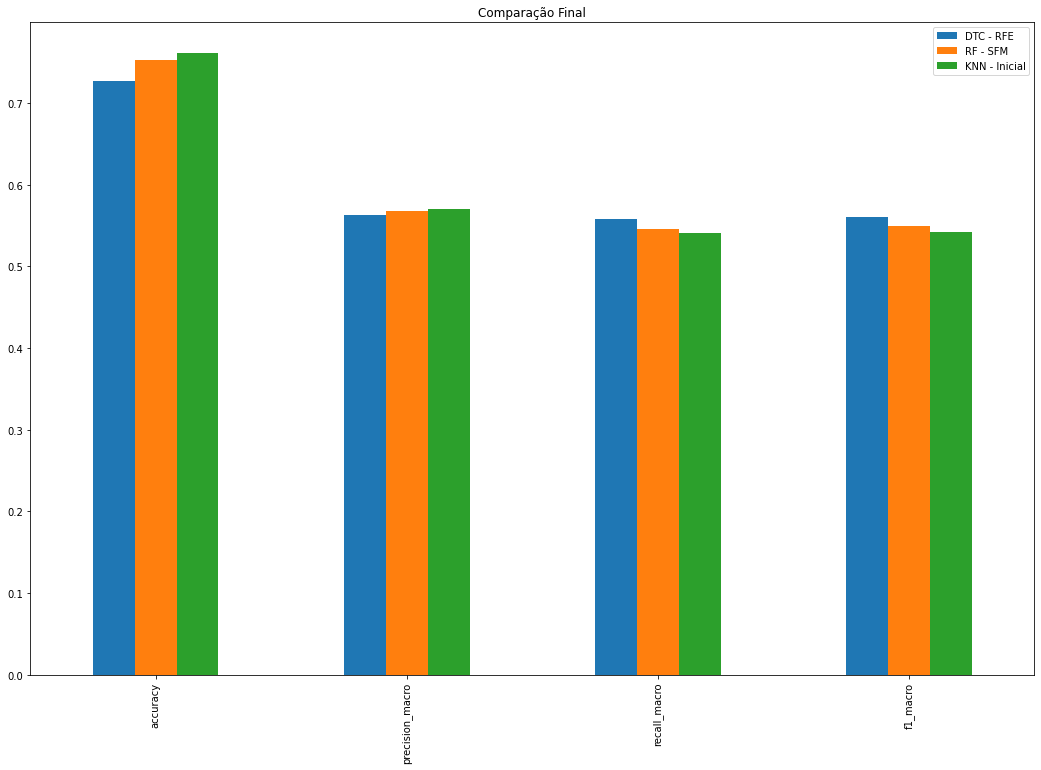

In [63]:
# Melhores classificadores em cada algoritmo após seleção de características relevantes
df = pd.DataFrame({'DTC - RFE': avg_scores_dtc_rfe,
                   'RF - SFM': avg_scores_rf_sfm,
                   'KNN - Inicial': avg_scores_knn}, index=scoring_list)
ax = df.plot.bar(figsize=(18,12), title='Comparação Final')

**Análise:** utilizou-se seleção de *features* através de três recursos distintos disponibilizados no sklearn, a saber: SelectFromModel (baseia-ne na importância das features), RFE (seleção recursiva de features, onde as menos importantes vão sendo excluídas a cada passo) e RFECV (seleção recursiva de features combinada com validação cruzada).

Tais técnicas não são suportadas pelo KNN, por isso não foram aplicadas neste classificador. Para compensar, variou-se os seguintes parâmetros para ter outras possibilidades de comparação: número de vizinhos, ponderação da distância e o algoritmo usado para calcular a distância. Realizou-se uma GridSearch para escolher o melhor modelo baseado na acurácia e então procedeu-se a uma nova execução da validação cruzada.

Conforme comentado na seção anterior, considerando os dados desbalanceados do estudo em questão, a escolha dos melhores modelos de cada classificador foi feita com base na medida F-measure, visto que ela combina recall e precision ao invés de considerar apenas a acurácia. O gráfico **Comparação Final** apresenta a comparação entre as métricas dos melhores modelos após a seleção de características, servindo como subsídio para a discussão.  

Passando à análise dos resultados dos diversos algoritmos, observou-se que o DecisionTreeClassifier com a seleção através de RFE apresentou melhor f-measure, sendo o primeiro indicado para a aplicação em questão. Ressalta-se ainda que as diferenças entre as f-measure dos melhores de cada modelo não foram significativas, sendo possível a utilização de qualquer um deles. Também destaca-se que as f-measure permaneceram abaixo de 60% mesmo após a seleção das características. 

Assim, pelo modelo escolhido, teria-se aproximadamente 56,31% de acertos da ausência, ao mesmo tempo que cerca de 55,86% das ausências seriam identificadas. Os resultados ainda aproximam-se da aborgadem ingênua e sugere-se a avaliação de outros modelos para tratar o caso ou ainda a utilização de novas características mais relevantes para o resultado.